## GitHub CI-compass Organization
- [GitHub Link: https://github.com/ci-compass/AI-working-scientist/tree/main](https://github.com/ci-compass/AI-working-scientist/tree/main)

# A guide to Generative AI for the Working Scientist

> This video is meant to be a rough guide to some of the concepts and to help understand generative AI and preparation for the NSF CyberInfrastructure Center of Excellence [CI-Compass](https://ci-compass.org/) [Virtual Workshop - AI Meets CI: Intelligent Infrastructure for Major & Midscale Facilities](https://ci-compass.org/news-and-events/events/virtual-workshop-ai-meets-ci-intelligent-infrastructure-for-major-and-midscale-facilities/). The purpose is to start from the beginning and try to de-mystify **chatbot** based Generative AI.

![](https://ci-compass.org/assets/629872/300x/ai_meets_ci_recreation_1.png)

## Chat based generative AI

### Chat interface
- [OpenAI ChatGPT](https://chatgpt.com/)
- [Anthropic Claude](https://claude.ai/new)
- [Google Gemini](https://gemini.google.com/)

### Terminal Based Coding Agents
- [Anthropic Claude Code Cli](https://www.claude.com/product/claude-code)
- [OpenAI Codex Cli](https://github.com/openai/codex)
- [Google Gemini Cli](https://geminicli.com/)
- [Microsoft Visual Studio Code](https://code.visualstudio.com/)

### Notebook Based AI
- [AnswerAI SolveIT](https://solve.it.com)
- [Google Collab](https://developers.googleblog.com/en/data-science-agent-in-colab-with-gemini/)

In [ ]:
from dialoghelper import *

Tools available from `dialoghelper`:

- &`curr_dialog`: Get the current dialog info.
- &`msg_idx`: Get absolute index of message in dialog.
- &`add_html`: Send HTML to the browser to be swapped into the DOM using hx-swap-oob.
- &`find_msg_id`: Get the current message id.
- &`find_msgs`: Find messages in current specific dialog that contain the given information.
  - (solveit can often get this id directly from its context, and will not need to use this if the required information is already available to it.)
- &`read_msg`: Get the message indexed in the current dialog.
  - To get the exact message use `n=0` and `relative=True` together with `msgid`.
  - To get a relative message use `n` (relative position index).
  - To get the nth message use `n` with `relative=False`, e.g `n=0` first message, `n=-1` last message.
- &`del_msg`: Delete a message from the dialog.
- &`add_msg`: Add/update a message to the queue to show after code execution completes.
- &`update_msg`: Update an existing message.
- &`url2note`: Read URL as markdown, and add a note below current message with the result
- &`msg_insert_line`: Insert text at a specific location in a message.
- &`msg_str_replace`: Find and replace text in a message.
- &`msg_strs_replace`: Find and replace multiple strings in a message.
- &`msg_replace_lines`: Replace a range of lines in a message with new content.
  - Always first use `read_msg( msgid=msgid, n=0, relative=True, nums=True)` to view the content with line numbers.

Tools available from `fastcore.tools`:

- &`rg`: Run the `rg` command with the args in `argstr` (no need to backslash escape)
- &`sed`: Run the `sed` command with the args in `argstr` (e.g for reading a section of a file)
- &`view`: View directory or file contents with optional line range and numbers
- &`create`: Creates a new file with the given content at the specified path
- &`insert`: Insert new_str at specified line number
- &`str_replace`: Replace first occurrence of old_str with new_str in file
- &`strs_replace`: Replace for each str pair in old_strs,new_strs
- &`replace_lines`: Replace lines in file using start and end line-numbers

In [ ]:
from fastcore.tools import *

## Tool Use
> Tool use is when a language model learns or is prompted to call external functions — like calculators, search engines, databases, or other APIs — to augment its own capabilities.

So I would like to demonstrate tool use within the Solvit notebook, which is meant to be sort of this presentation walkthrough of LLM based topics. So I'd like to use essentially a simple definition or a simple Python function, and then use fast query-tills to explain how you can get essentially cast the function to something the LLM understands in terms of JSON. And then lastly, sort of demonstrate how you can then use the tool within your context.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! Let's build this demonstration step by step. We'll create a simple Python function, show how to make it "LLM-readable" using JSON schema, and then demonstrate tool use in action.

Let's start with a simple example function. What kind of function would you like to use for the demonstration? Some options:

1. A calculator function (e.g., compound interest, unit conversion)
2. A data lookup function (e.g., get information about something)
3. A text processing function (e.g., count words, analyze sentiment)
4. Something domain-specific for your audience (CI/research computing related?)

What would work best for your presentation context?

Yeah, I think something domain specific might be kind of good. So I have RD-Kit installed. Could we walk through step by step in the solvit sort of way of how to create a function for RD-Kit?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! RDKit is great for this - it's domain-specific and will resonate with your research computing audience.

Let's start simple. What kind of molecular operation would you like to demonstrate? Here are some straightforward options:

1. Calculate molecular weight from a SMILES string
2. Count the number of atoms in a molecule
3. Check if a SMILES string is valid
4. Calculate LogP (lipophilicity)

Which one sounds good, or do you have another RDKit function in mind?

## Use RDKit as a Tool

- [RDKit GitHub](https://github.com/rdkit/rdkit)

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = (350,300)

from rdkit.Chem import Descriptors

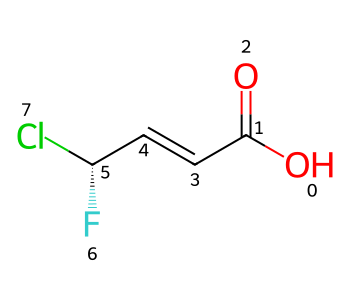

In [ ]:
IPythonConsole.drawOptions.addAtomIndices = True

m = Chem.MolFromSmiles('OC(=O)/C=C/[C@H](F)Cl')
m

In [ ]:

def get_molecular_weight(smiles: str) -> float:
    """
    Calculate the molecular weight of a molecule from its SMILES string.
    
    Args:
        smiles: A SMILES string representing the molecule
        
    Returns:
        The molecular weight in g/mol, or None if the SMILES is invalid
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return Descriptors.MolWt(mol)

In [ ]:
from fastcore.meta import delegates
import inspect

# Show the JSON schema that describes the function
print(get_molecular_weight.__name__)
print(inspect.signature(get_molecular_weight))
print(get_molecular_weight.__doc__)

get_molecular_weight
(smiles: str) -> float

    Calculate the molecular weight of a molecule from its SMILES string.

    Args:
        smiles: A SMILES string representing the molecule

    Returns:
        The molecular weight in g/mol, or None if the SMILES is invalid
    


In [ ]:
from toolslm.funccall import get_schema
get_schema(get_molecular_weight)

{'name': 'get_molecular_weight',
 'description': '\n    Calculate the molecular weight of a molecule from its SMILES string.\n\n    Args:\n        smiles: A SMILES string representing the molecule\n\n    Returns:\n        The molecular weight in g/mol, or None if the SMILES is invalid\n    \n\nReturns:\n- type: number',
 'input_schema': {'type': 'object',
  'properties': {'smiles': {'type': 'string', 'description': ''}},
  'required': ['smiles']}}

This is good, but that is the metadata description that is passed to the llm. How does a LLM actually 'invoke' a python function?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great question! The LLM doesn't directly invoke the Python function. Here's the flow:

1. **LLM sees the schema** (what you just printed) and decides it needs to call the tool
2. **LLM returns a tool call request** with the function name and arguments as JSON
3. **Your code intercepts this** and actually executes the Python function
4. **Results go back to the LLM** so it can continue reasoning

Want to see this in action? We could demonstrate the complete loop where:
- You give the LLM a task (e.g., "What's the molecular weight of aspirin?")
- It decides to call `get_molecular_weight` 
- Your code executes it
- The LLM uses the result to answer

Should we build that demonstration next?

### Lookup SMILES string from Wikidata
Wikidata [property https://www.wikidata.org/wiki/Property:P1687](https://www.wikidata.org/wiki/Property:P1687) for [SMILES https://www.wikidata.org/wiki/Q466769](https://www.wikidata.org/wiki/Q466769)   to lookup the SMILES string Wikidata. Note, [Isomemeric SMILES https://www.wikidata.org/wiki/Property:P2017](https://www.wikidata.org/wiki/Property:P2017). As an example [Ethanol https://www.wikidata.org/wiki/Q153](https://www.wikidata.org/wiki/Q153).

Ok. I'm a bit worried you might hallucinate an SMILES String. Could we use Wikidata and the wikidata property for SMILES https://www.wikidata.org/wiki/Property:P1687 to lookup the SMILES string?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good thinking! Using Wikidata will give us real, verified SMILES strings. 

To query Wikidata, we can use their SPARQL endpoint. Would you like to:

1. Create a function that takes a molecule name (like "caffeine" or "aspirin") and returns its SMILES string from Wikidata?
2. Or create a function that takes a Wikidata QID (like Q60235 for aspirin) and returns the SMILES?

Which approach would work better for your demo?

No I want a function that queries the wikidata api given a chemical (ethanol) and returns the SMILES from wikidata.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Got it! Here's a function that queries Wikidata's SPARQL endpoint to get the SMILES string for a chemical by name:

```python
import requests

def get_smiles_from_wikidata(chemical_name: str) -> str:
    """
    Get the SMILES string for a chemical from Wikidata.
    
    Args:
        chemical_name: The name of the chemical (e.g., "ethanol", "caffeine")
        
    Returns:
        The SMILES string, or None if not found
    """
    endpoint = "https://query.wikidata.org/sparql"
    
    query = f"""
    SELECT ?smiles WHERE {{
      ?item rdfs:label "{chemical_name}"@en .
      ?item wdt:P233 ?smiles .
    }}
    LIMIT 1
    """
    
    response = requests.get(endpoint, params={'query': query, 'format': 'json'})
    data = response.json()
    
    if data['results']['bindings']:
        return data['results']['bindings'][0]['smiles']['value']
    return None
```

Go ahead and run this. Once it's defined, we can test it with "ethanol" and then show how both functions look to an LLM!

In [ ]:
import requests

def get_smiles_from_wikidata(chemical_name: str) -> str:
    """
    Get the SMILES string for a chemical from Wikidata.
    
    Args:
        chemical_name: The name of the chemical (e.g., "ethanol", "caffeine")
        
    Returns:
        The SMILES string, or None if not found
    """
    endpoint = "https://query.wikidata.org/sparql"
    
    query = f"""
    SELECT ?smiles WHERE {{
      ?item rdfs:label "{chemical_name}"@en .
      ?item wdt:P233 ?smiles .
    }}
    LIMIT 1
    """
    
    response = requests.get(endpoint, params={'query': query, 'format': 'json'})
    data = response.json()
    
    if data['results']['bindings']:
        return data['results']['bindings'][0]['smiles']['value']
    return None

Ok. How do I test this function?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Try calling it with a chemical name:

```python
get_smiles_from_wikidata("ethanol")
```

This should return the SMILES string for ethanol. Give it a try!

In [ ]:
get_smiles_from_wikidata("ethanol")

'CCO'

Ok. Can you demonstrate how to use &`get_molecular_weight` and &`get_smiles_from_wikidata`

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Now that I have access to both tools via the ampersand-backtick notation, I can use them directly.

Let me demonstrate by getting the molecular weight of ethanol:

<details class='tool-usage-details'>

```json
{
  "id": "toolu_01A2wbu9AZpXEAwse8D29Qk5",
  "call": {
    "function": "get_smiles_from_wikidata",
    "arguments": {
      "chemical_name": "ethanol"
    }
  },
  "result": "'CCO'"
}
```

</details>

Now I'll use that SMILES string to calculate the molecular weight:

<details class='tool-usage-details'>

```json
{
  "id": "toolu_01DzKUxD8Gjrgby8SpXNUgiL",
  "call": {
    "function": "get_molecular_weight",
    "arguments": {
      "smiles": "CCO"
    }
  },
  "result": "46.069"
}
```

</details>

So ethanol (CCO) has a molecular weight of approximately 46.07 g/mol!

This demonstrates how an LLM can:
1. Call the first tool to look up the SMILES string from Wikidata
2. Use that result to call the second tool to calculate molecular weight
3. Chain tools together to accomplish a task

Would you like to try another chemical, or shall we look at how to inspect the JSON schema that describes these tools to the LLM?

Could we try a harder example like semaglutide (Q27261089)?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great choice - semaglutide is a much more complex molecule (it's a peptide drug)! 

Let me try looking it up by name first:

<details class='tool-usage-details'>

```json
{
  "id": "toolu_01BNfTpowmE4y4PrZ4FGv7UW",
  "call": {
    "function": "get_smiles_from_wikidata",
    "arguments": {
      "chemical_name": "semaglutide"
    }
  },
  "result": "'CCC(C)C(NC(=O)C(Cc1ccccc1)NC(=O)C(CCC(=O)O)NC(=O)C(CCCCNC(=O)COCCOCCNC(=O)COCCOCCNC(=O)CCC(NC(=O)CCCCCCCCCCCCCCCCC(=O)O)C(=O)O)NC(=O)C(C)NC(=O)C(C)NC(=O)C(CCC(N)=O)NC(=O)CNC(=O)C(CCC(=O)O)NC(=O)C(CC(C)C)NC(=O)C(Cc1ccc(O)cc1)NC(=O)C(CO)NC(=O)C(CO)NC(=O)C(NC(=O)C(CC(=O)O)NC(=O)C(CO)NC(=O)C(NC(=O)C(Cc1ccccc1)NC(=O)C(NC(=O)CNC(=O)C(CCC(=O)O)NC(=O)C(C)(C)NC(=O)C(N)Cc1cnc[nH]1)C(C)O)C(C)O)C(C)C)C(=O)NC(C)C(=O)NC(Cc1c[nH]c2ccccc12)C(=O)NC(CC(C)C)C(=O)NC(C(=O)NC(CCCNC(=N)N)C(=O)NCC(=O)NC(CCCNC(=N)N)C(=O)NCC(=O)O)C(C)C'"
}
```

</details>

Wow, that's a huge SMILES string! Now let's calculate its molecular weight:

<details class='tool-usage-details'>

```json
{
  "id": "toolu_01Kem9PMNQGLx12xnvVjMoL5",
  "call": {
    "function": "get_molecular_weight",
    "arguments": {
      "smiles": "CCC(C)C(NC(=O)C(Cc1ccccc1)NC(=O)C(CCC(=O)O)NC(=O)C(CCCCNC(=O)COCCOCCNC(=O)COCCOCCNC(=O)CCC(NC(=O)CCCCCCCCCCCCCCCCC(=O)O)C(=O)O)NC(=O)C(C)NC(=O)C(C)NC(=O)C(CCC(N)=O)NC(=O)CNC(=O)C(CCC(=O)O)NC(=O)C(CC(C)C)NC(=O)C(Cc1ccc(O)cc1)NC(=O)C(CO)NC(=O)C(CO)NC(=O)C(NC(=O)C(CC(=O)O)NC(=O)C(CO)NC(=O)C(NC(=O)C(Cc1ccccc1)NC(=O)C(NC(=O)CNC(=O)C(CCC(=O)O)NC(=O)C(C)(C)NC(=O)C(N)Cc1cnc[nH]1)C(C)O)C(C)O)C(C)C)C(=O)NC(C)C(=O)NC(Cc1c[nH]c2ccccc12)C(=O)NC(CC(C)C)C(=O)NC(C(=O)NC(CCCNC(=N)N)C(=O)NCC(=O)NC(CCCNC(=N)N)C(=O)NCC(=O)O)C(C)C"
    }
  },
  "result": "4113.640999999982"
}
```

</details>

Excellent! Semaglutide has a molecular weight of approximately 4113.64 g/mol - that's a big molecule compared to ethanol's 46.07!

This shows how the tools can handle both simple small molecules and complex peptides. What would you like to explore next?

How could the "inferred from smiles" Wikidata Entity  https://www.wikidata.org/wiki/Q113907573 be used in this context for provenance annotation?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

That's a great question about provenance! The "inferred from SMILES" entity (Q113907573) is a Wikidata reference qualifier that indicates data was computationally derived from a SMILES string.

In your context, you could use it to document that the molecular weight calculation was:
1. Based on a SMILES string retrieved from Wikidata
2. Computed (not experimentally measured)
3. Traceable back to the original data source

How would you want to capture this provenance? Some options:

1. Return it as metadata alongside the molecular weight (e.g., as a dictionary with the value and provenance info)
2. Log it separately for auditing purposes
3. Structure it as RDF triples for semantic web applications

What fits best with your use case for the CI infrastructure audience?

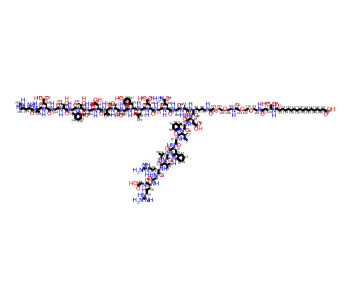

In [ ]:
s = Chem.SmilesParserParams()
ps.removeHs = False
m = Chem.MolFromSmiles('CC[C@H](C)[C@@H](C(=O)N[C@@H](C)C(=O)N[C@@H](CC1=CNC2=CC=CC=C21)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C(C)C)C(=O)N[C@@H](CCCNC(=N)N)C(=O)NCC(=O)N[C@@H](CCCNC(=N)N)C(=O)NCC(=O)O)NC(=O)[C@H](CC3=CC=CC=C3)NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](CCCCNC(=O)COCCOCCNC(=O)COCCOCCNC(=O)CC[C@H](C(=O)O)NC(=O)CCCCCCCCCCCCCCCCC(=O)O)NC(=O)[C@H](C)NC(=O)[C@H](C)NC(=O)[C@H](CCC(=O)N)NC(=O)CNC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC4=CC=C(C=C4)O)NC(=O)[C@H](CO)NC(=O)[C@H](CO)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(=O)O)NC(=O)[C@H](CO)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CC5=CC=CC=C5)NC(=O)[C@H]([C@@H](C)O)NC(=O)CNC(=O)[C@H](CCC(=O)O)NC(=O)C(C)(C)NC(=O)[C@H](CC6=CN=CN6)N',ps)
m

### General Purpose Terminal Based Tools for Coding Agents

- Somewhat based on the ["Unix Philosophy" https://en.wikipedia.org/wiki/Unix_philosophy](https://en.wikipedia.org/wiki/Unix_philosophy)
- [Anthropic: "Writing Effective tools for Agents With Agents" https://www.anthropic.com/engineering/writing-tools-for-agents](https://www.anthropic.com/engineering/writing-tools-for-agents)

Tools available from `fastcore.tools`:

- &`rg`: Run the `rg` command with the args in `argstr` (no need to backslash escape)
- &`sed`: Run the `sed` command with the args in `argstr` (e.g for reading a section of a file)
- &`view`: View directory or file contents with optional line range and numbers
- &`create`: Creates a new file with the given content at the specified path
- &`insert`: Insert new_str at specified line number
- &`str_replace`: Replace first occurrence of old_str with new_str in file
- &`strs_replace`: Replace for each str pair in old_strs,new_strs
- &`replace_lines`: Replace lines in file using start and end line-numbers